# It's Raining Bells, Hallelujah!

<img src="https://mcsun.org/wp-content/uploads/2020/05/Banner-Animal-Crossing-New-Horizons.jpg">

## A guide to living large in Animal Crossing: New Horizons

### by Kwame V. Taylor

It's Raining Bells, Hallelujah is data-driven guide to getting rich and staying rich with maximized efficiency on the Nintendo Switch video game, Animal Crossing: New Horizons.

Bells are the currency used in the video game, Animal Crossing: New Horizons. Users can buy and sell items using bells, as well as exchange bells and items with both in-game characters (also known as Non-Playable Characters, or NPCs) and other users.

### Set up environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=13)

### Acquire data

Let's look at insects first, since I already know that people love to bank big on catching tarantulas and scorpions.

In [2]:
insects = pd.read_csv('insects.csv')

In [3]:
insects.sort_values(by="Sell", ascending=False).head(6)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
29,61,giraffe stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins77,InsectGirafanokogirikuwagata,FtrInsectGirafanokogirikuwagata,3482,PSChjzMhGwhnsHTs4
30,60,golden stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Yellow,Ins50,InsectOugononikuwagata,FtrInsectOugononikuwagata,638,2C8cSphidFCBPxYEe
39,65,horned hercules,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Yellow,Black,Ins54,InsectHerakuresuohkabuto,FtrInsectHerakuresuohkabuto,600,TqhEomNEMDZ2wcTpk
65,52,scarab beetle,10000,On trees (any kind),Any weather,50,3,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Beige,Ins43,InsectPurachinakogane,FtrInsectPurachinakogane,639,2HXdFD8s6BmYYMf4u
27,57,giant stag,10000,On trees (any kind),Any weather,50,5,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins47,InsectOhkuwagata,FtrInsectOhkuwagata,637,KhrTLzayFz23zz2kn
31,54,goliath beetle,8000,On palm trees,Any weather,100,2,NaN,NaN,NaN,...,NaN,NaN,5 PM – 8 AM,Red,Black,Ins55,InsectGoraiasuohtsunohanamuguri,FtrInsectGoraiasuohtsunohanamuguri,596,wZQMZfhtRyPFAapmF


### Prepare data

First I'll set the index to #.

In [4]:
insects = insects.set_index('#')

Then I'll drop some of the columns I won't be using.

In [5]:
insects = insects.drop(columns=['Icon Filename', 'Critterpedia Filename', 'Furniture Filename',
       'Internal ID', 'Unique Entry ID'])

And impute NaNs with 0s.

In [6]:
insects = insects.fillna(0)

In [7]:
insects.isna().sum()

Name                       0
Sell                       0
Where/How                  0
Weather                    0
Total Catches to Unlock    0
Spawn Rates                0
NH Jan                     0
NH Feb                     0
NH Mar                     0
NH Apr                     0
NH May                     0
NH Jun                     0
NH Jul                     0
NH Aug                     0
NH Sep                     0
NH Oct                     0
NH Nov                     0
NH Dec                     0
SH Jan                     0
SH Feb                     0
SH Mar                     0
SH Apr                     0
SH May                     0
SH Jun                     0
SH Jul                     0
SH Aug                     0
SH Sep                     0
SH Oct                     0
SH Nov                     0
SH Dec                     0
Color 1                    0
Color 2                    0
dtype: int64

Now I'll check data types.

In [8]:
insects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 10 to 2
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     80 non-null     object
 1   Sell                     80 non-null     int64 
 2   Where/How                80 non-null     object
 3   Weather                  80 non-null     object
 4   Total Catches to Unlock  80 non-null     int64 
 5   Spawn Rates              80 non-null     object
 6   NH Jan                   80 non-null     object
 7   NH Feb                   80 non-null     object
 8   NH Mar                   80 non-null     object
 9   NH Apr                   80 non-null     object
 10  NH May                   80 non-null     object
 11  NH Jun                   80 non-null     object
 12  NH Jul                   80 non-null     object
 13  NH Aug                   80 non-null     object
 14  NH Sep                   80 non-null     obj

Spawn Rates needs to be an integer.

In [9]:
insects['Spawn Rates'].value_counts()

5       11
2        8
30       7
10       7
20       6
50       6
60       6
40       6
70       4
1        4
0        3
25       2
7        2
35       2
15       2
3        1
80       1
5–10     1
200      1
Name: Spawn Rates, dtype: int64

Because one of the values is a range, I'm going to make it the average of the start and end values rounded to the nearest integer, which is 8.

In [10]:
insects['Spawn Rates'] = insects['Spawn Rates'].where(insects['Spawn Rates'] != '5–10', 8).astype(int)

In [11]:
insects['Spawn Rates'].value_counts()

5      11
2       8
10      7
30      7
20      6
60      6
50      6
40      6
70      4
1       4
0       3
15      2
7       2
25      2
35      2
8       1
200     1
3       1
80      1
Name: Spawn Rates, dtype: int64

In [12]:
insects.head(3)

,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2
#,,,,,,,,,,,,,,,,,,,,,
10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,0,0,0,8 AM – 5 PM,...,0,0,0,0,0,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green
69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,All day,Black,White
14,Atlas moth,3000,On trees (any kind),Any weather,20,5,0,0,0,7 PM – 4 AM,...,0,0,0,0,0,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow


Looks cleaned up enough to head into data exploration.

### Feature Engineering

Idea for feature engineering: Sell / Spawn Rates

In [13]:
insects["SellSpawnRate"] = insects.Sell / (insects['Spawn Rates'] + 1)

In [14]:
insects["SellSpawnRate"].value_counts()

2666.666667    6
2.622951       3
6000.000000    3
416.666667     3
54.545455      3
500.000000     3
4.878049       2
4.225352       2
5.000000       2
666.666667     2
2500.000000    2
47.619048      2
9.677419       2
272.727273     1
8.196721       1
1666.666667    1
333.333333     1
5.853659       1
40.909091      1
7.777778       1
93.750000      1
1.492537       1
3.521127       1
95.238095      1
1000.000000    1
750.000000     1
150.000000     1
400.000000     1
9.523810       1
37.500000      1
27.777778      1
60.000000      1
72.727273      1
80.000000      1
7.049180       1
16.129032      1
1.971831       1
19.047619      1
10.784314      1
11.904762      1
4.901961       1
2.549020       1
9.803922       1
9.756098       1
11.764706      1
13.870968      1
5.609756       1
562.500000     1
19.354839      1
2.222222       1
4.193548       1
38.461538      1
266.666667     1
3.921569       1
6.451613       1
31.818182      1
2.926829       1
2.131148       1
Name: SellSpaw

### Exploratory Data Analysis

In [15]:
insects.describe()

,Sell,Total Catches to Unlock,Spawn Rates,SellSpawnRate
count,80.000000,80.00000,80.000000,80.000000
mean,2220.500000,17.50000,26.375000,619.755309
std,3209.388877,30.08427,29.890253,1330.032791
min,10.000000,0.00000,0.000000,1.492537
25%,237.500000,0.00000,5.000000,5.792683
50%,600.000000,0.00000,20.000000,37.980769
75%,2625.000000,20.00000,40.000000,437.500000
max,12000.000000,100.00000,200.000000,6000.000000


In [16]:
moth_avg = insects[insects['Name'].str.contains('moth')].Sell.mean()
butterfly_avg = insects[insects['Name'].str.contains('butterfly')].Sell.mean()
beetle_avg = insects[insects['Name'].str.contains('beetle')].Sell.mean()
dragonfly_avg = insects[insects['Name'].str.contains('dragonfly')].Sell.mean()
stag_avg = insects[insects['Name'].str.contains('stag')].Sell.mean()
cicada_avg = insects[insects['Name'].str.contains('cicada')].Sell.mean()
horned_avg = insects[insects['Name'].str.contains('horned')].Sell.mean()
cricket_avg = insects[insects['Name'].str.contains('cricket')].Sell.mean()

Text(0, 0.5, 'Bells')

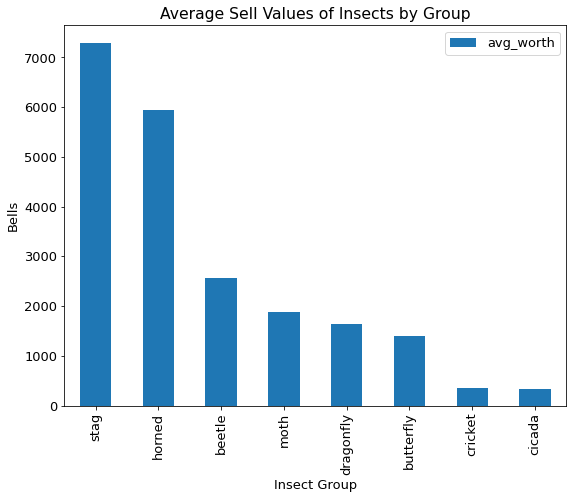

In [17]:
avg_worth_by_group_insects = pd.DataFrame([moth_avg, butterfly_avg, beetle_avg, dragonfly_avg, stag_avg, cicada_avg, horned_avg, cricket_avg], 
                                          ['moth', 'butterfly', 'beetle', 'dragonfly', 'stag', 'cicada', 'horned', 'cricket'])
avg_worth_by_group_insects = avg_worth_by_group_insects.rename(columns={0: "avg_worth"})

avg_worth_by_group_insects.sort_values(by="avg_worth", ascending=False).plot.bar()
plt.title("Average Sell Values of Insects by Group")
plt.xlabel("Insect Group")
plt.ylabel("Bells")